imported libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  #4 basic lib
from sklearn.model_selection import train_test_split# splitting function
from sklearn.linear_model import LogisticRegression



data collection and processing


In [ ]:
#loading the csv file into pandas dataset
titanic_data = pd.read_csv('/content/train.csv')

In [ ]:
#prionting the first five rows of the datra frame
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#number of rows and colume
import pandas as pd

In [ ]:
titanic_data = pd.read_csv('/content/train.csv')

In [ ]:
print(titanic_data.shape)

(891, 12)


In [ ]:
#getting some information about the data
#there are some missing values in age as the total count of passengers is 891
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#check the number of missing values in each column
titanic_data.isnull().sum()
 #gives the number of missing va,lues in each column
#here there are 177 missing values in age column,687 missing values in cabin column and embarked only 2
#so totally we can say that only 200 values were present

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

handling missing values

In [ ]:
#drop tha cabin column frome the dataframe
#we are droping the cabin column as it have too many missing values
#given the same name to the dataframe to avoid confussion for my self
titanic_data = titanic_data.drop(columns='Cabin',axis=1)

In [ ]:
#as we connot directly drop the age column as it does not has too many missing vales as the cabin has so for that
#replacing the missing values inn age column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(),inplace=True)

In [ ]:
#finding the mode value of embarked column
#the most repeated value is s in embarked column so we can conclude that the the most missing values will be from s section
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
print(titanic_data['Embarked'].mode()[0])

S


In [ ]:
#replacing the missing values in embarked column with mode value
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)
#succesfully replaced the value

In [ ]:
titanic_data.isnull().sum()
#now we have replcaed the missing value

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

data analysis

In [ ]:
#getting some statistical data about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#finding the number of people survuive and not survive
titanic_data['Survived'].value_counts()
#out of 891 passengers 549 did not survived and 342 survived

0    549
1    342
Name: Survived, dtype: int64

data visualization

<Axes: xlabel='Survived', ylabel='count'>

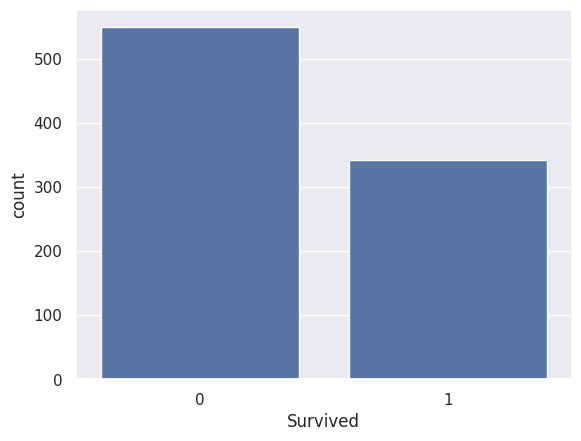

In [ ]:
#making a count plot for "survived" column
import pandas as pd
titanic_data = pd.read_csv('/content/train.csv')
sns.countplot(x='Survived', data=titanic_data)

In [ ]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

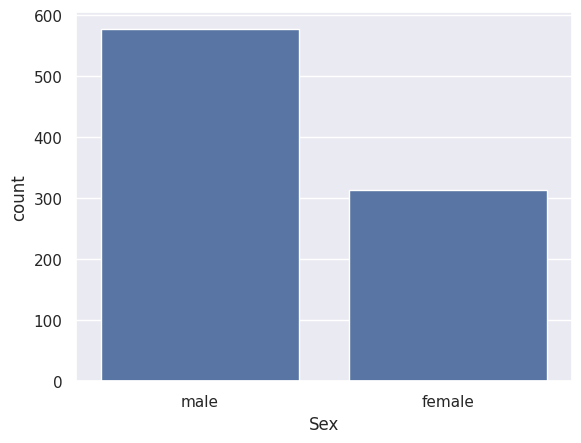

In [ ]:
#making a count plot for "sex" column
import seaborn as sns
titanic_data.columns
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

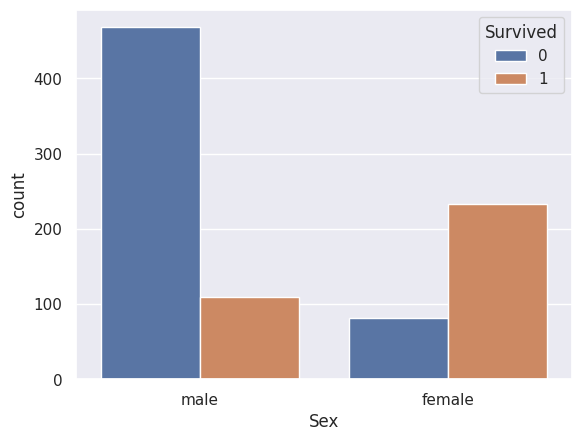

In [ ]:
#number of survivals based on gender
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
#although the male count is greater then the females but the survival rate for the females is greater in comprison to the male
#so we can say that during the titanic acident females were given more priority then males

<Axes: xlabel='Pclass', ylabel='count'>

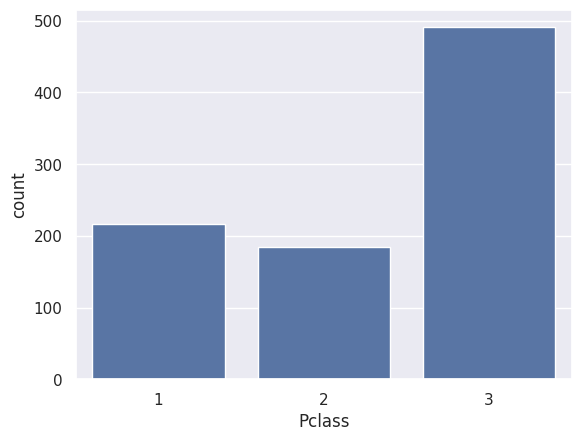

In [ ]:
#making a count plot for pclass
import seaborn as sns
titanic_data.columns
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

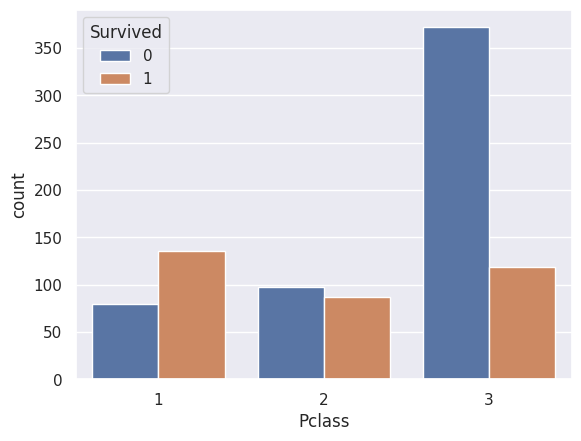

In [ ]:
#number of survivals based on Pclass
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)


<Axes: xlabel='Age', ylabel='count'>

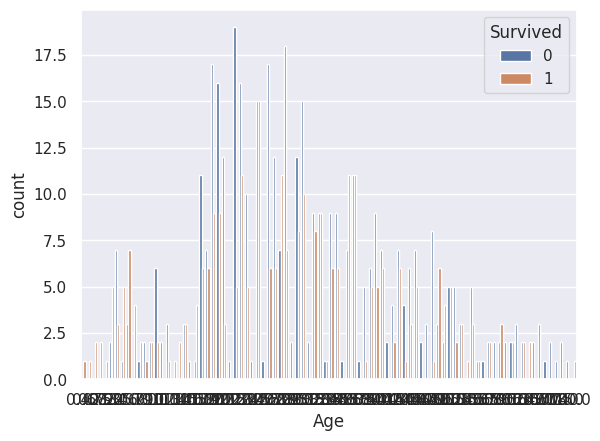

In [ ]:
#number of survivals based on age
sns.countplot(x='Age', hue='Survived', data=titanic_data)


<Axes: xlabel='PassengerId', ylabel='count'>

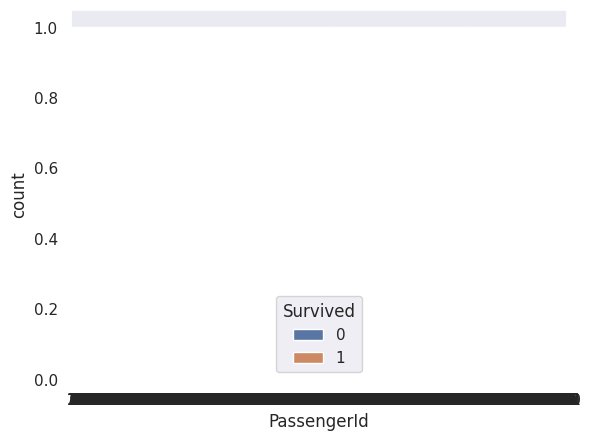

In [ ]:
sns.countplot(x='PassengerId', hue='Survived', data=titanic_data)

encoding the categorical column

In [ ]:
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


separating features and target

In [ ]:
!pip install pandas
import pandas as pd
titanic_data = pd.read_csv('/content/train.csv')
x = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis=1)
y = titanic_data['Survived']

In [ ]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


spliting the data into training data and testing data

In [ ]:
from sklearn.model_selection import train_test_split
print(globals())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

{'__name__': '__main__', '__doc__': 'Automatically created module for IPython interactive environment', '__package__': None, '__loader__': None, '__spec__': None, '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '_ih': ['', 'print(y)', "x = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis=1)\ny = titanic_data['Survived']", "get_ipython().system('pip install pandas')", "get_ipython().system('pip install pandas')\nimport pandas as pd", "get_ipython().system('pip install pandas')\nimport pandas as pd\ntitanic_data = pd.read_csv('/content/train.csv')", "get_ipython().system('pip install pandas')\nimport pandas as pd\ntitanic_data = pd.read_csv('/content/train.csv')\nx = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'], axis=1)\ny = titanic_data['Survived']", 'print(y)', 'print(y)', 'x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)', 'from sklearn.model_select

In [ ]:
print(x.shape, x_train.shape,x_test.shape)

(891, 8) (712, 8) (179, 8)


evaluation